In [2]:
import soundfile as sf
import librosa
import time

# Path to the .flac file
file_path = "../real_man_dataset/val/dp_speech/Auditorium/moving/P0010/VAL_M_AUDI_P0010_P0010W0001.flac"

# Using soundfile
start = time.time()
data_sf, sr_sf = sf.read(file_path)
end = time.time()
print("Soundfile load time:", end - start)

# Using librosa
start = time.time()
data_librosa, sr_librosa = librosa.load(file_path, sr=None)
end = time.time()
print("Librosa load time:", end - start)


Soundfile load time: 0.1028280258178711
Librosa load time: 6.734888315200806


In [4]:
import librosa

# Load the .flac file
file_path = "../real_man_dataset/val/dp_speech/Auditorium/moving/P0010/VAL_M_AUDI_P0010_P0010W0001.flac"

data, sample_rate = librosa.load(file_path, sr=None)

# Print information
print("Sample rate:", sample_rate)
print("Data shape:", data.shape)

Sample rate: 48000
Data shape: (169727,)


In [10]:
from data_loaders import RealisticAudioDataset
# if __name__ == '__main__':
#     """python -m data_loaders.realistic_audio"""
dset = RealisticAudioDataset(
    dataset='val',  #, cv_dev93, test_eval92
    audio_time_len=None,
    dataset_dir='../real_man_dataset',
    noise_dir=None,
    record_dir='../real_man_dataset/val/ma_noisy_speech',
    target_dir='../real_man_dataset/val/dp_speech',
    spk_pattern='all',
    noise_type='real',
    use_microphone_array_generalization=True,
)


print(dset.length)
for i in range(dset.length):
    one_item = dset.__getitem__((i, i))
    print(one_item[2])
    if  i>2:
        break 


6698
{'index': 0, 'seed': 0, 'saveto': ['Auditorium/moving/P0010/VAL_M_AUDI_P0010_P0010W0001_CH0.flac'], 'sample_rate': 16000, 'dataset': 'RealisticAudio/val', 'audio_time_len': None, 'num_spk': 1, 'data': None, 'save_for_ASR': False, 'scene': 'Auditorium', 'utterance_id': 'P0010W0001', 'speakerId': 'P0010', 'starting_channelId': 'CH0'}
{'index': 1, 'seed': 1, 'saveto': ['Auditorium/moving/P0010/VAL_M_AUDI_P0010_P0010W0004_CH0.flac'], 'sample_rate': 16000, 'dataset': 'RealisticAudio/val', 'audio_time_len': None, 'num_spk': 1, 'data': None, 'save_for_ASR': False, 'scene': 'Auditorium', 'utterance_id': 'P0010W0004', 'speakerId': 'P0010', 'starting_channelId': 'CH0'}
{'index': 2, 'seed': 2, 'saveto': ['Auditorium/moving/P0010/VAL_M_AUDI_P0010_P0010W0005_CH0.flac'], 'sample_rate': 16000, 'dataset': 'RealisticAudio/val', 'audio_time_len': None, 'num_spk': 1, 'data': None, 'save_for_ASR': False, 'scene': 'Auditorium', 'utterance_id': 'P0010W0005', 'speakerId': 'P0010', 'starting_channelId': 

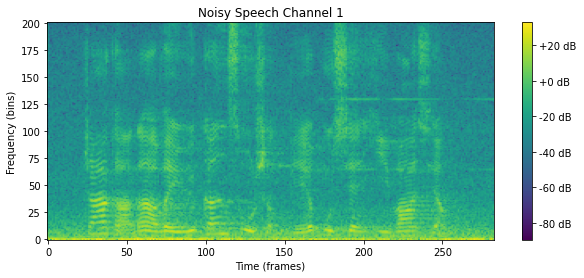

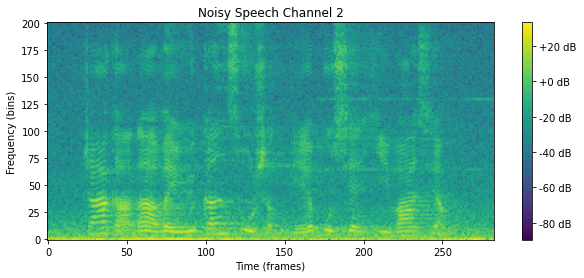

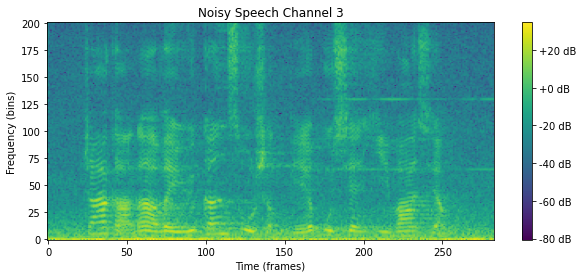

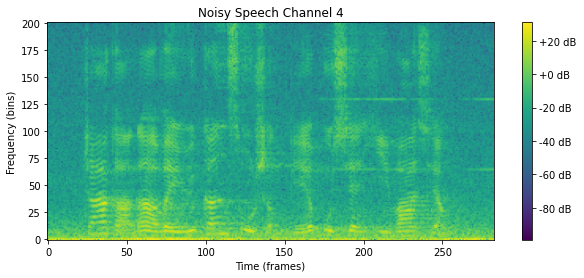

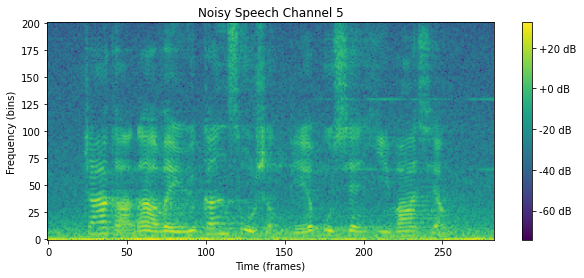

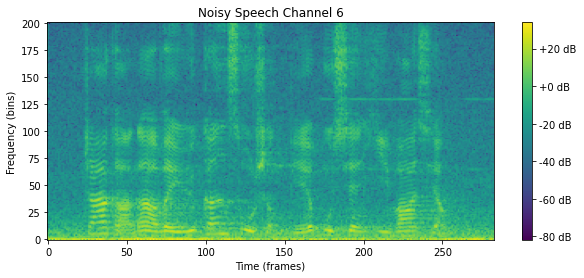

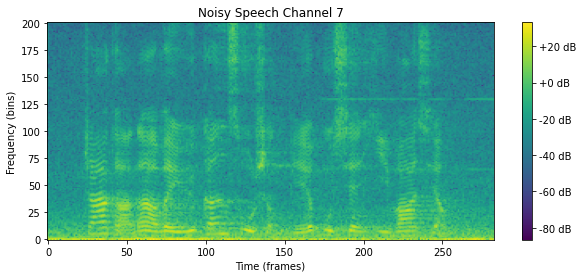

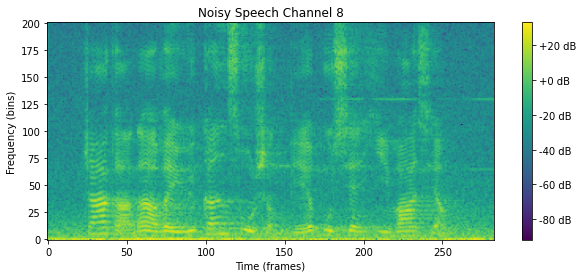

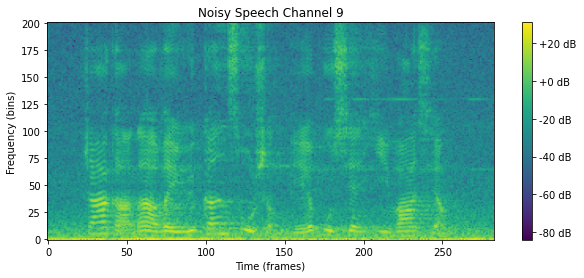

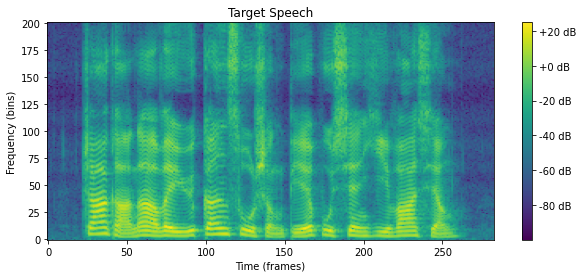

In [9]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Sample data
noisy_speech = one_item[0]  # Simulating noisy speech with 9 channels
target_speech = one_item[1]  # Simulating target speech

# Function to compute and plot the spectrogram
# Function to compute and plot the spectrogram
def plot_spectrogram(waveform, title, vmin=0, vmax=15):
    # Compute the spectrogram
    spectrogram = torchaudio.transforms.Spectrogram()(waveform)

    # Convert to dB scale (optional, if needed)
    spectrogram_db = 10 * torch.log10(spectrogram + 1e-10)  # Adding a small value to avoid log(0)

    # Plotting the spectrogram
    plt.figure(figsize=(10, 4))
    plt.title(title)
    # im = plt.imshow(spectrogram_db[0].detach().numpy(), aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
    im = plt.imshow(spectrogram_db[0].detach().numpy(), aspect='auto', origin='lower')
    plt.colorbar(im, format='%+2.0f dB')
    plt.xlabel('Time (frames)')
    plt.ylabel('Frequency (bins)')
    plt.show()

# Plot spectrograms for noisy speech
for i in range(noisy_speech.size(0)):
    plot_spectrogram(noisy_speech[i:i+1], f'Noisy Speech Channel {i+1}')

# Plot spectrogram for target speech
plot_spectrogram(target_speech.squeeze(0), 'Target Speech')


In [1]:
from torch.utils.data import DistributedSampler, T_co


ImportError: cannot import name 'T_co' from 'torch.utils.data' (/home/ahsan/miniconda3/envs/task/lib/python3.9/site-packages/torch/utils/data/__init__.py)

In [1]:
from scipy.io import wavfile

# Load the wav file
sample_rate, data = wavfile.read('../chime_6_dataset/CHiME6_dev/CHiME6/audio/dev/S02_P05.wav')

print(f"Sample rate: {sample_rate}")
print(f"Data shape: {data.shape}")


Sample rate: 16000
Data shape: (142464640, 2)


In [2]:
from scipy.io import wavfile

# Load the wav file
sample_rate, data = wavfile.read('../chime_6_dataset/CHiME6_dev/CHiME6/audio/dev/S02_U01.CH3.wav')

print(f"Sample rate: {sample_rate}")
print(f"Data shape: {data.shape}")


Sample rate: 16000
Data shape: (142507907,)


In [1]:
from scipy.io import wavfile

# Load the wav file
sample_rate, data = wavfile.read('../chime_6_dataset/CHiME6_dev/CHiME6/audio/dev/S02_U02.CH2.wav')

print(f"Sample rate: {sample_rate}")
print(f"Data shape: {data.shape}")


Sample rate: 16000
Data shape: (142491802,)


In [ ]:
# python train_od_awaAE.py --dataset airbus --device 0 -l 1e-4 -n 351 -r 0.0 -k 0.0 -t 0.1 -z 80 -bs 8 --seed 0 -corpen 0.0 -vae ResBasedVAE -wt 80 -ht 112 -p True

In [16]:
from PIL import Image

def crop_image(input_image_path, output_image_path, left_crop, right_crop, top_crop, bottom_crop):
    # Open the image
    with Image.open(input_image_path) as img:
        # Get the dimensions of the image
        width, height = img.size
        
        # Define the crop rectangle (left, upper, right, lower)
        crop_rectangle = (left_crop, top_crop, width - right_crop, height - bottom_crop)
        
        # Crop the image
        cropped_img = img.crop(crop_rectangle)
        
        # Save the cropped image
        cropped_img.save(output_image_path)
        print(f"Cropped image saved as: {output_image_path}")

# Example usage
input_image = "./Data/clean_images/spectrograms_S02_P05/spectrogram_chunk_0000.png"  # Path to the input image
output_image = "test_cropped_image.png"  # Path to save the cropped image
left_crop = 80    # Pixels to crop from the left
right_crop = 200   # Pixels to crop from the right
top_crop = 40     # Pixels to crop from the top
bottom_crop = 60   # Pixels to crop from the bottom

crop_image(input_image, output_image, left_crop, right_crop, top_crop, bottom_crop)


Cropped image saved as: test_cropped_image.png


In [1]:
from audio_encoders_pytorch import AutoEncoder1d
import torch
autoencoder = AutoEncoder1d(
    in_channels=2,              # Number of input channels
    channels=32,                # Number of base channels
    multipliers=[1, 1, 2, 2],   # Channel multiplier between layers (i.e. channels * multiplier[i] -> channels * multiplier[i+1])
    factors=[4, 4, 4],          # Downsampling/upsampling factor per layer
    num_blocks=[2, 2, 2]        # Number of resnet blocks per layer
)

x = torch.randn(1, 2, 2**18)    # [1, 2, 262144]
x_recon = autoencoder(x)        # [1, 2, 262144]




torch.Size([1, 64, 4096])
torch.Size([1, 2, 262144])


In [1]:
import torch
import torchaudio
from audio_encoders_pytorch import AutoEncoder1d

# Initialize the AutoEncoder1d model
autoencoder = AutoEncoder1d(
    in_channels=2,              # Number of input channels
    channels=32,                # Number of base channels
    multipliers=[1, 1, 2, 2],   # Channel multiplier between layers
    factors=[4, 4, 4],          # Downsampling/upsampling factor per layer
    num_blocks=[2, 2, 2]        # Number of resnet blocks per layer
)

# Load the WAV file
filepath = './CantinaBand60.wav'  # Replace with your file path
waveform, sample_rate = torchaudio.load(filepath)

# Check the shape of the waveform
print(f"Original waveform shape: {waveform.shape}, {sample_rate}")

# Reshape and normalize the audio data
# Assuming stereo audio (2 channels), so no extra processing needed if it’s already stereo
# For mono, duplicate the channel to match in_channels=2

if waveform.shape[0] == 1:  # If mono, duplicate the channel
    waveform = waveform.repeat(2, 1)

# Reshape to [batch, channels, time]
waveform = waveform.unsqueeze(0)  # Add batch dimension

# Ensure waveform length matches model input requirements (2**18 in this example)
desired_length = 2**18
if waveform.shape[2] < desired_length:
    # Pad with zeros if the audio is shorter
    waveform = torch.nn.functional.pad(waveform, (0, desired_length - waveform.shape[2]))
elif waveform.shape[2] > desired_length:
    # Truncate if the audio is longer
    waveform = waveform[:, :, :desired_length]

# Pass the waveform through the autoencoder
x_recon = autoencoder(waveform)

print(f"Reconstructed waveform shape: {x_recon.shape}")


Original waveform shape: torch.Size([1, 1323000]), 22050
torch.Size([1, 64, 4096])
torch.Size([1, 2, 262144])
Reconstructed waveform shape: torch.Size([1, 2, 262144])


In [4]:

import os
import json
import numpy as np
import librosa
import pickle

def create_output_directory(base_path, session_id, speaker):
    """Create output directory for complex data only."""
    complex_dir = os.path.join(base_path, f'complex_specs_{session_id}_{speaker}_U03.CH3')
    os.makedirs(complex_dir, exist_ok=True)
    return complex_dir

def load_audio_chunk(file_path, start_time_str, end_time_str):
    """Load a chunk of audio from the file using timestamp strings."""
    def timestamp_to_seconds(timestamp):
        h, m, s = timestamp.split(':')
        return float(h) * 3600 + float(m) * 60 + float(s)
    
    start_seconds = timestamp_to_seconds(start_time_str)
    end_seconds = timestamp_to_seconds(end_time_str)
    duration = end_seconds - start_seconds
    
    y, sr = librosa.load(file_path, offset=start_seconds, duration=duration)
    return y, sr

def create_complex_spectrogram(y, sr):
    """Create complex spectrogram with both magnitude and phase information."""
    # STFT parameters
    n_fft = 2048
    hop_length = 512
    win_length = 2048
    window = 'hann'
    
    # Compute complex STFT
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, 
                     win_length=win_length, window=window)
    
    # Separate magnitude and phase
    magnitude = np.abs(D)
    phase = np.angle(D)
    
    return {
        'magnitude': magnitude,
        'phase': phase,
        'params': {
            'sr': sr,
            'n_fft': n_fft,
            'hop_length': hop_length,
            'win_length': win_length,
            'window': window
        }
    }

def save_complex_data(spec_data, output_path):
    """Save complete complex spectrogram data as a .pkl file."""
    with open(output_path, 'wb') as f:
        pickle.dump(spec_data, f)

def process_audio_file(audio_file, json_file, target_speaker):
    """Process an audio file into complex spectrograms with phase information."""
    base_path = os.path.dirname(audio_file)
    
    # Load JSON data
    with open(json_file, 'r') as f:
        segments = json.load(f)
    
    # Filter segments for target speaker
    speaker_segments = [seg for seg in segments if seg['speaker'] == target_speaker]
    
    if speaker_segments:
        session_id = speaker_segments[0]['session_id']
        complex_dir = create_output_directory(base_path, session_id, target_speaker)
    else:
        print(f"No segments found for speaker {target_speaker}")
        return
    
    print(f"Processing {len(speaker_segments)} segments for speaker {target_speaker}")
    
    for i, segment in enumerate(speaker_segments):
        try:
            # Load audio chunk
            y, sr = load_audio_chunk(audio_file, segment['start_time'], segment['end_time'])
            
            # Generate output filename
            base_filename = f"{target_speaker}_{i:04d}_{segment['start_time'].replace(':', '_')}"
            complex_path = os.path.join(complex_dir, f"complex_{base_filename}.pkl")
            
            # Create and save complex spectrogram
            spec_data = create_complex_spectrogram(y, sr)
            save_complex_data(spec_data, complex_path)
            
            print(f"Processed segment {i + 1}/{len(speaker_segments)}")
            
        except Exception as e:
            print(f"Error processing segment {i}: {str(e)}")
            continue

if __name__ == "__main__":
    audio_file = "../chime_6_dataset/CHiME6_dev/CHiME6/audio/dev/S02_U03.CH3.wav"
    json_file = "../chime_6_dataset/CHiME6_transcriptions/transcriptions/transcriptions/dev/S02.json"
    target_speaker = "P08"
    
    process_audio_file(audio_file, json_file, target_speaker)


Processing 1051 segments for speaker P08
Processed segment 1/1051
Processed segment 2/1051
Processed segment 3/1051
Processed segment 4/1051
Processed segment 5/1051
Processed segment 6/1051
Processed segment 7/1051
Processed segment 8/1051
Processed segment 9/1051
Processed segment 10/1051
Processed segment 11/1051
Processed segment 12/1051
Processed segment 13/1051
Processed segment 14/1051
Processed segment 15/1051
Processed segment 16/1051
Processed segment 17/1051
Processed segment 18/1051
Processed segment 19/1051
Processed segment 20/1051
Processed segment 21/1051
Processed segment 22/1051
Processed segment 23/1051
Processed segment 24/1051
Processed segment 25/1051
Processed segment 26/1051
Processed segment 27/1051
Processed segment 28/1051
Processed segment 29/1051
Processed segment 30/1051
Processed segment 31/1051
Processed segment 32/1051
Processed segment 33/1051
Processed segment 34/1051
Processed segment 35/1051
Processed segment 36/1051
Processed segment 37/1051
Proces

In [2]:
# Calculate variance across the batch dimension for each feature
variances = np.var(z1, axis=0)

# Get indices of the top n features with the highest variance
top_n_indices = np.argsort(variances)[-n:]  # Get the last n indices with highest variance

# Select the top n features based on variance
z1_reduced_covariance = z1[:, top_n_indices]

print("Shape of reduced features (using covariance method):", z1_reduced_covariance.shape)  # Should be (4, n)


Shape of reduced features (using covariance method): (4, 10)


In [ ]:
from speechbrain.inference.separation import SepformerSeparation as separator
import torchaudio
import torch
import torch.nn.functional as F
from torchmetrics.audio import PerceptualEvaluationSpeechQuality as PESQ
from torchmetrics import SignalNoiseRatio as SNR

# Load the model for audio source separation
model = separator.from_hparams(source="speechbrain/sepformer-wham-enhancement", savedir='pretrained_models/sepformer-wham-enhancement')

# Custom file path - replace 'example_noisy_audio.wav' with your noisy audio path
noisy_audio_path = './'
clean_audio_path = './Data/complex/complex_specs_S02_P08/Test/complex_P08_0851_02_02_27.51.pkl'

# Separate sources
est_sources = model.separate_file(path=noisy_audio_path)
enhanced_audio = est_sources[:, :, 0].detach().cpu()  # Take the first separated source if multiple sources are output

# Load clean audio for comparison
clean_audio, sample_rate = torchaudio.load(clean_audio_path)

# Ensure both audio files are of the same length for loss calculation
min_length = min(clean_audio.shape[1], enhanced_audio.shape[1])
clean_audio = clean_audio[:, :min_length]
enhanced_audio = enhanced_audio[:, :min_length]

# Save the enhanced audio
torchaudio.save("enhanced_output.wav", enhanced_audio, sample_rate)

# Compute Mean Squared Error (MSE) Loss
mse_loss = F.mse_loss(enhanced_audio, clean_audio)

# Compute Perceptual Evaluation of Speech Quality (PESQ) - perceptual loss
pesq = PESQ(sample_rate=sample_rate, mode='wb')  # Mode 'wb' for wideband PESQ
pesq_loss = pesq(enhanced_audio, clean_audio)

# Compute Signal-to-Noise Ratio (SNR)
snr_metric = SNR()
snr_loss = snr_metric(enhanced_audio, clean_audio)

# Output the losses
print("MSE Loss:", mse_loss.item())
print("Perceptual Loss (PESQ):", pesq_loss.item())
print("SNR Loss:", snr_loss.item())


INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/sepformer-wham-enhancement' if not cached


hyperparams.yaml:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/sepformer-wham-enhancement' if not cached
INFO:speechbrain.utils.fetching:Fetch encoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wham-enhancement' if not cached


encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch masknet.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wham-enhancement' if not cached


masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch decoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wham-enhancement' if not cached


decoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: encoder, masknet, decoder
/home/ahsan/miniconda3/envs/task/lib/python3.9/site-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an i

LibsndfileError: Error opening '/home/ahsan/Ahsan/PhD work/AAAI_2025_PAPER/Task-Aware-audio-coding-perceptual/Data/complex/complex_specs_S02_P08_U02.CH3/Test/complex_P08_0851_02_02_27.51.pkl': Format not recognised.